In [1]:
import pandas as pd
from keras import layers, Model
from pandas import read_csv
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
import timeit 
from sklearn.preprocessing import MinMaxScaler
from numpy import linalg as la
from google.colab import files
import io
from google.colab import drive
from sklearn.preprocessing import StandardScaler
drive.mount("/content/gdrive")
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report


Mounted at /content/gdrive


In [3]:
# کد های بالا فیچر ها رو داخل فایل سی اس وی میریزه
data = pd.read_csv('/content/gdrive/MyDrive/ML_PROJECT/data.csv')
data.head()

,filename,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,10.ogg,0.172109,0.160323,1364.344456,1258.592175,2237.128139,0.076699,-252.416428,121.376038,-75.999443,-21.006634,-14.176373,-25.648235,-15.026352,-14.021082,-18.048792,13.675592,-8.886734,-10.225346,-11.382644,-23.615202,-9.837443,2.837608,7.311616,15.285730,28.113136,13.851759,ney
1,100.ogg,0.144347,0.397188,2667.270693,2562.900506,5860.672895,0.071928,-121.873596,7.836360,-47.482792,-31.510834,-60.898518,-30.677765,-36.838665,-6.815788,-3.072187,19.794920,12.085742,11.913527,-2.081229,-12.192745,-2.550208,-0.366075,-2.494725,-1.881683,10.741643,5.378603,ney
2,101.ogg,0.143907,0.423747,2311.350857,2466.870951,5187.210300,0.058621,-146.173828,25.193405,-30.676767,-15.189541,-31.676628,-10.613235,-32.881638,-17.282505,-19.348412,0.274465,7.420251,13.588500,5.091373,-0.937903,-6.645022,-1.869061,-8.361086,-9.584910,-7.565945,-4.581150,ney
3,102.ogg,0.135277,0.415720,2359.148504,2448.678542,5272.793116,0.066651,-116.191879,33.266212,-30.781305,-19.073294,-44.281799,-16.623301,-36.351337,-13.627455,-10.225366,11.268692,4.663882,9.540560,-13.354314,-11.329946,-11.759642,-0.385233,-4.925459,2.783390,13.298392,7.341113,ney
4,103.ogg,0.146942,0.357927,1648.908938,2048.969301,3375.387923,0.056880,-142.883560,76.426750,-19.965134,-5.031665,-31.392530,-12.276963,-34.029884,-25.061098,-28.775530,-15.263958,-8.113994,-9.485208,-11.305043,-8.059875,-7.315244,1.998333,-7.306895,-9.482360,-3.459121,-2.967434,ney


In [4]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()
# file name can drop; its not important

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.172109,0.160323,1364.344456,1258.592175,2237.128139,0.076699,-252.416428,121.376038,-75.999443,-21.006634,-14.176373,-25.648235,-15.026352,-14.021082,-18.048792,13.675592,-8.886734,-10.225346,-11.382644,-23.615202,-9.837443,2.837608,7.311616,15.285730,28.113136,13.851759,ney
1,0.144347,0.397188,2667.270693,2562.900506,5860.672895,0.071928,-121.873596,7.836360,-47.482792,-31.510834,-60.898518,-30.677765,-36.838665,-6.815788,-3.072187,19.794920,12.085742,11.913527,-2.081229,-12.192745,-2.550208,-0.366075,-2.494725,-1.881683,10.741643,5.378603,ney
2,0.143907,0.423747,2311.350857,2466.870951,5187.210300,0.058621,-146.173828,25.193405,-30.676767,-15.189541,-31.676628,-10.613235,-32.881638,-17.282505,-19.348412,0.274465,7.420251,13.588500,5.091373,-0.937903,-6.645022,-1.869061,-8.361086,-9.584910,-7.565945,-4.581150,ney
3,0.135277,0.415720,2359.148504,2448.678542,5272.793116,0.066651,-116.191879,33.266212,-30.781305,-19.073294,-44.281799,-16.623301,-36.351337,-13.627455,-10.225366,11.268692,4.663882,9.540560,-13.354314,-11.329946,-11.759642,-0.385233,-4.925459,2.783390,13.298392,7.341113,ney
4,0.146942,0.357927,1648.908938,2048.969301,3375.387923,0.056880,-142.883560,76.426750,-19.965134,-5.031665,-31.392530,-12.276963,-34.029884,-25.061098,-28.775530,-15.263958,-8.113994,-9.485208,-11.305043,-8.059875,-7.315244,1.998333,-7.306895,-9.482360,-3.459121,-2.967434,ney


In [5]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 ... 5 5 5]


In [6]:
'''Normalizing the dataset
'''
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)

(1192, 26)


In [8]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print(y_train)


[4 1 5 ... 0 4 1]


[[0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 70)                1890      
                                                                 
 dense_25 (Dense)            (None, 70)                4970      
                                                                 
 dense_26 (Dense)            (None, 85)                6035      
                                                                 
 dense_27 (Dense)            (None, 80)                6880      
                                                                 
 dense_28 (Dense)            (None, 12)                972       
                                                                 
 dense_29 (Dense)            (None, 6)                

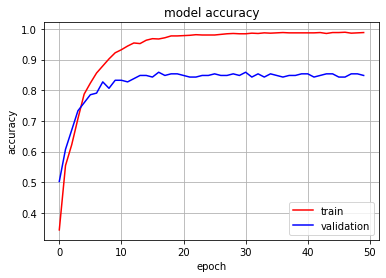

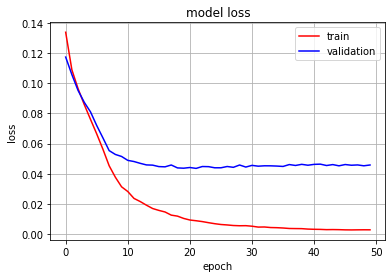

In [14]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print(Y_train)
d=26
model = Sequential()
model.add(Dense(70, activation='relu', input_shape=(26,)))	#Hidden Layer 1
model.add(Dense(70, activation='relu'))	#Hidden Layer 2
model.add(Dense(85, activation='relu'))	#Hidden Layer 2
model.add(Dense(80, activation='relu'))	#Hidden Layer 2
#model.add(Dense(24, activation='relu'))	#Hidden Layer 2
model.add(Dense(12, activation='relu'))	#Hidden Layer 2
model.add(Dense(6, activation='relu')) #Last layer with one output per class
#model.add(Dense(6, activation='softmax')) #Last layer with one output per class

model.summary()

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


start = timeit.default_timer()
history = model.fit(X_train, Y_train, epochs=50, batch_size=64,validation_split=0.16) 
stop = timeit.default_timer()
print('Time: ', stop - start)
#history = model.fit(x_train, y_train, epochs=50, batch_size=8,validation_split=0.1) 	
#history = model.fit(x_train, y_train, epochs=50, batch_size=8,validation_split=0.1) 
#history = model.fit(x_train, y_train, epochs=50, batch_size=8,validation_split=0.1) 	


# validation_data=[x_valid, y_valid]
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

# Evaluate the trained model
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
#Y_test = np.argmax(Y_test, axis=1)

#print(y_pred)
# Evaluate the trained model
#[test_loss, test_acc] 
#[test_loss , test_accuracy] = model.evaluate(X_test, Y_test)
#print("Test Accuracy", test_accuracy)
#######################################

# Confusion Matrix
#class_names=[0,1,2,3,4,5,6,7,8,9]
print("---------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("---------------------")
#print(Y_test , y_pred)
